Notebook For Plotting ML Experiment Errors By Site

To use, run in a Python 3 Kernel on https://jupyterhub.hpc.ucar.edu/

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import sklearn
from sklearn.metrics import r2_score, mean_squared_error
print(f"pandas v. {pd.__version__}")
print(f"sklearn v. {sklearn.__version__}")

pandas v. 1.4.2
sklearn v. 1.1.1


In [70]:
def plot_site_vars(df,var_name,title_pre):
    state_borders = gpd.read_file('data/usa-states-census-2014.shp')
    state_borders = state_borders.to_crs("EPSG:3395")
    var_gdf = gpd.GeoDataFrame(df[var_name], geometry=gpd.points_from_xy(df["longitude"],df["latitude"]))
    var_gdf = var_gdf.set_crs('epsg:4326')
    var_gdf = var_gdf.to_crs(state_borders.crs)
    fig, ax = plt.subplots(figsize = (11,9))
    state_borders.boundary.plot(ax=ax,color="black")
    var_gdf.plot(column = var_name, ax=ax,cmap = 'rainbow',
                legend = True, legend_kwds={'shrink': 0.3}, 
                markersize = 10) 
                #markersize = 10,vmin=0, vmax=35) 
    ax.set_title(f"{title_pre} {var_name.upper()}")


In [71]:
def drop_chebychev(df, col, k=6):
    mu = df[col].mean()
    sigma = df[col].std()
    ubound = mu+k*sigma
    lbound = mu-k*sigma
    drop_idxs = df[(df[col] < lbound) | (df[col] > ubound)].index
    return df.drop(drop_idxs)

def drop_outliers(df, y_col, y_hat_col):
    df = drop_chebychev(df,y_col)
    df = drop_chebychev(df,y_hat_col)
    return df

def calc_site_r2_rmse(df, y_col, y_hat_col):
    def r2_rmse(grp):
        r2 = r2_score(grp[y_col], grp[y_hat_col])
        rmse = np.sqrt(mean_squared_error(grp[y_col], grp[y_hat_col]))
        return pd.Series(dict(r2 = r2, rmse = rmse))
    df_error = df.groupby(['n_site','latitude','longitude']).apply(r2_rmse).reset_index()
    #Cap r2 at -1,1
    df_error.loc[df_error['r2'] < -1.0,'r2'] = -1.0
    df_error.loc[df_error['r2'] > 1.0,'r2'] = 1.0
    #print(df_error['rmse'].max())
    return df_error

/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


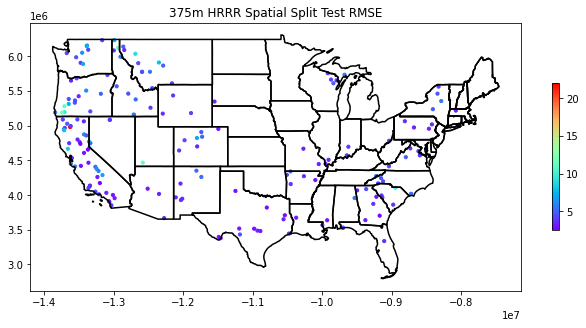

In [72]:
df = pd.read_parquet('/glade/work/schreck/repos/fmc-repo/fmc/results/hrrr_sat/1000/site_375/evaluate/y_test.parquet')
df = drop_outliers(df, '10h_dead_fuel_moisture_content', 'y_pred')
df_error = calc_site_r2_rmse(df,'10h_dead_fuel_moisture_content', 'y_pred')
#plot_site_vars(df_error,'r2','375m HRRR Spatial Split Test')
plot_site_vars(df_error,'rmse','375m HRRR Spatial Split Test')

/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


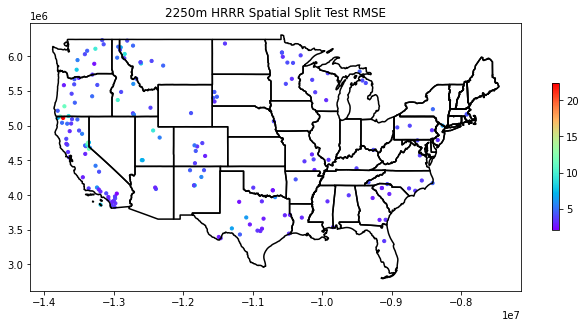

In [73]:
df = pd.read_parquet('/glade/work/schreck/repos/fmc-repo/fmc/results/hrrr_sat/1000/site_2250/evaluate/y_test.parquet')
df = drop_outliers(df, '10h_dead_fuel_moisture_content', 'y_pred')
df_error = calc_site_r2_rmse(df,'10h_dead_fuel_moisture_content', 'y_pred')
#plot_site_vars(df_error,'r2','2250m HRRR Spatial Split Test')
plot_site_vars(df_error,'rmse','2250m HRRR Spatial Split Test')

/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


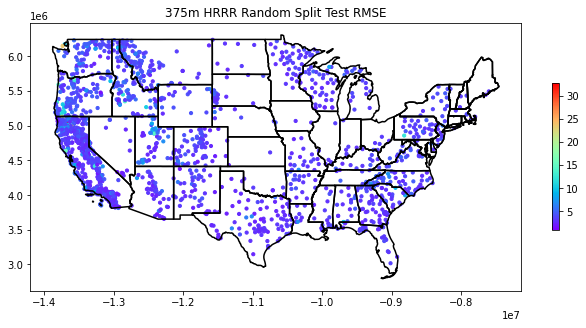

In [74]:
df = pd.read_parquet('/glade/work/schreck/repos/fmc-repo/fmc/results/hrrr_sat/1000/rand_375/evaluate/y_test.parquet')
df = drop_outliers(df, '10h_dead_fuel_moisture_content', 'y_pred')
df_error = calc_site_r2_rmse(df,'10h_dead_fuel_moisture_content', 'y_pred')
#plot_site_vars(df_error,'r2','375m HRRR Random Split Test')
plot_site_vars(df_error,'rmse','375m HRRR Random Split Test')

/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


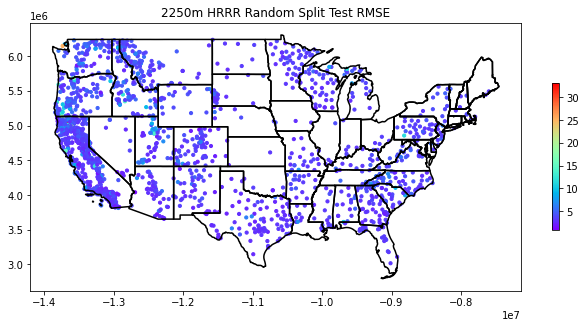

In [75]:
df = pd.read_parquet('/glade/work/schreck/repos/fmc-repo/fmc/results/hrrr_sat/1000/rand_2250/evaluate/y_test.parquet')
df = drop_outliers(df, '10h_dead_fuel_moisture_content', 'y_pred')
df_error = calc_site_r2_rmse(df,'10h_dead_fuel_moisture_content', 'y_pred')
#plot_site_vars(df_error,'r2','2250m HRRR Random Split Test')
plot_site_vars(df_error,'rmse','2250m HRRR Random Split Test')

/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


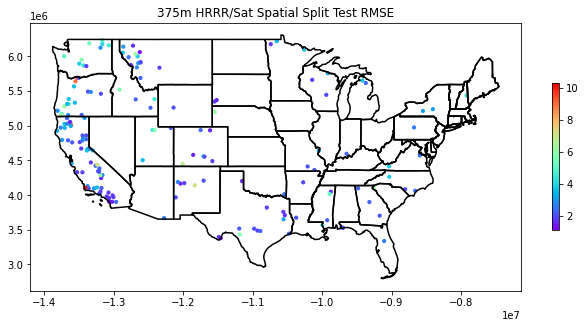

In [76]:
df = pd.read_parquet('/glade/work/schreck/repos/fmc-repo/fmc/results/hrrr_sat/1010/site_375/evaluate/y_test.parquet')
df = drop_outliers(df, '10h_dead_fuel_moisture_content', 'y_pred')
df_error = calc_site_r2_rmse(df,'10h_dead_fuel_moisture_content', 'y_pred')
#plot_site_vars(df_error,'r2','375m HRRR/Sat Spatial Split Test')
plot_site_vars(df_error,'rmse','375m HRRR/Sat Spatial Split Test')

/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


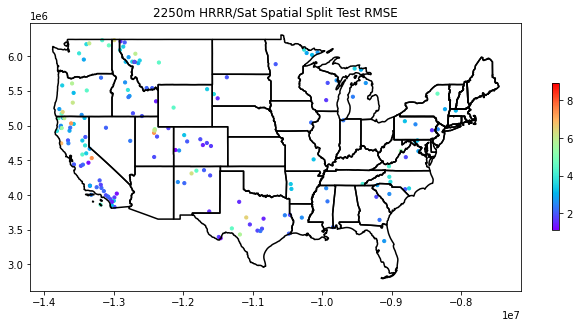

In [77]:
df = pd.read_parquet('/glade/work/schreck/repos/fmc-repo/fmc/results/hrrr_sat/1010/site_2250/evaluate/y_test.parquet')
df = drop_outliers(df, '10h_dead_fuel_moisture_content', 'y_pred')
df_error = calc_site_r2_rmse(df,'10h_dead_fuel_moisture_content', 'y_pred')
#plot_site_vars(df_error,'r2','2250m HRRR/Sat Spatial Split Test')
plot_site_vars(df_error,'rmse','2250m HRRR/Sat Spatial Split Test')

/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2

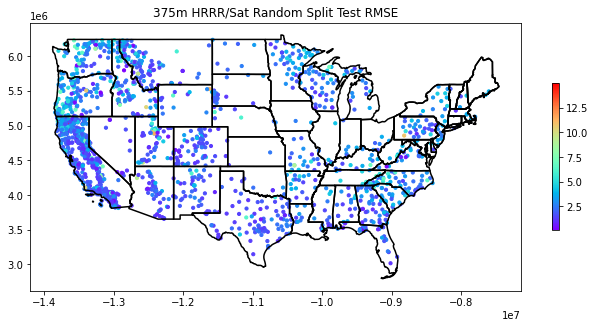

In [78]:
df = pd.read_parquet('/glade/work/schreck/repos/fmc-repo/fmc/results/hrrr_sat/1010/rand_375/evaluate/y_test.parquet')
df = drop_outliers(df, '10h_dead_fuel_moisture_content', 'y_pred')
df_error = calc_site_r2_rmse(df,'10h_dead_fuel_moisture_content', 'y_pred')
#plot_site_vars(df_error,'r2','375m HRRR/Sat Random Split Test')
plot_site_vars(df_error,'rmse','375m HRRR/Sat Random Split Test')

/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/glade/u/home/bpetzke/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2

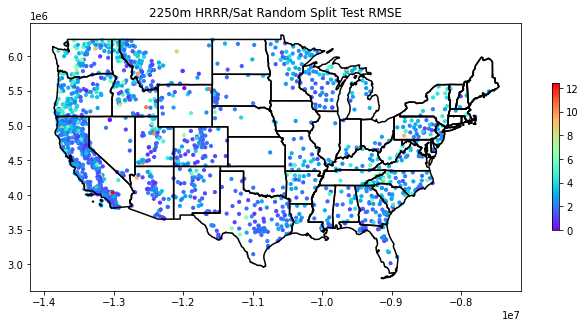

In [79]:
df = pd.read_parquet('/glade/work/schreck/repos/fmc-repo/fmc/results/hrrr_sat/1010/rand_2250/evaluate/y_test.parquet')
df = drop_outliers(df, '10h_dead_fuel_moisture_content', 'y_pred')
df_error = calc_site_r2_rmse(df,'10h_dead_fuel_moisture_content', 'y_pred')
#plot_site_vars(df_error,'r2','2250m HRRR/Sat Random Split Test')
plot_site_vars(df_error,'rmse','2250m HRRR/Sat Random Split Test')